In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in the team codes and teaam wins by season data for use in plots
csv_path = "../Cleaned_Data/team_codes_and_names.csv"
nba_team_names_df = pd.read_csv(csv_path)

del nba_team_names_df['Unnamed: 0']
#Convert Team Code to uppercase.
nba_team_names_df["Team Code"] = nba_team_names_df['Team Code'].str.upper()
nba_team_names_df

,Team Code,Team Name
0,ATL,Atlanta Hawks
1,BOS,Boston Celtics
2,BRK,Brooklyn Nets
3,CHI,Chicago Bulls
4,CHO,Charlotte Hornets
5,CLE,Cleveland Cavaliers
6,DAL,Dallas Mavericks
7,DEN,Denver Nuggets
8,DET,Detroit Pistons
9,GSW,Golden State Warriors


In [3]:
# Reference to the team wins CSV and read the CSV into DataFrame
csv_path = "../Raw_Data/NBA Team Wins.csv"
nba_wins_df = pd.read_csv(csv_path)

# Drop columns that are not needed, and Nan rows
nba_wins_df.drop('Rank', axis = 1, inplace = True)
nba_wins_df.dropna(how = 'any', inplace = True)
nba_wins_df.set_index('Season',inplace = True)
#Transpose the dtaframe
# nba_wins_df = nba_wins_df.T
nba_wins_df = nba_wins_df.reset_index()
nba_wins_df = nba_wins_df.sort_values("Season", ascending=True)
nba_wins_df

,Season,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
4,2014-15,60.0,40.0,38.0,50.0,33.0,53.0,50.0,30.0,32.0,...,45.0,25.0,18.0,39.0,51.0,29.0,55.0,49.0,38.0,46.0
3,2015-16,48.0,48.0,21.0,42.0,48.0,57.0,42.0,33.0,44.0,...,55.0,35.0,10.0,23.0,44.0,33.0,67.0,56.0,40.0,41.0
2,2016-17,43.0,53.0,20.0,41.0,36.0,51.0,33.0,40.0,37.0,...,47.0,29.0,28.0,24.0,41.0,32.0,61.0,51.0,51.0,49.0
1,2017-18,24.0,55.0,28.0,27.0,36.0,50.0,24.0,46.0,39.0,...,48.0,25.0,52.0,21.0,49.0,27.0,47.0,59.0,48.0,43.0
0,2018-19,29.0,49.0,42.0,22.0,39.0,19.0,33.0,54.0,41.0,...,49.0,42.0,51.0,19.0,53.0,39.0,48.0,58.0,50.0,32.0


In [4]:
nba_wins_df.T

,4,3,2,1,0
Season,2014-15,2015-16,2016-17,2017-18,2018-19
ATL,60,48,43,24,29
BOS,40,48,53,55,49
BRK,38,21,20,28,42
CHI,50,42,41,27,22
CHO,33,48,36,36,39
CLE,53,57,51,50,19
DAL,50,42,33,24,33
DEN,30,33,40,46,54
DET,32,44,37,39,41


In [5]:
#Find the teams with the top 5 total number of wins over the past 5 seasons
nba_sum_wins_sorted_df = nba_wins_df.set_index('Season')
nba_sum_wins_sorted_df = nba_sum_wins_sorted_df.sum()
nba_sum_wins_sorted_df = pd.DataFrame(nba_sum_wins_sorted_df.sort_values(ascending = False))
nba_sum_wins_sorted_df = nba_sum_wins_sorted_df.reset_index()
nba_sum_wins_sorted_df = nba_sum_wins_sorted_df.rename(columns={'index':'Team Code', 0: 'Total Wins'})

# Merge in the team names joining by Team code
nba_sum_wins_sorted_df = pd.merge(nba_sum_wins_sorted_df, nba_team_names_df, on='Team Code', how='outer')

nba_sum_wins_sorted_df


,Team Code,Total Wins,Team Name
0,GSW,322.0,Golden State Warriors
1,SAS,278.0,San Antonio Spurs
2,TOR,273.0,Toronto Raptors
3,HOU,270.0,Houston Rockets
4,LAC,250.0,LA Clippers
5,BOS,245.0,Boston Celtics
6,OKC,244.0,Oklahoma City Thunder
7,POR,238.0,Portland Trail Blazers
8,CLE,230.0,Cleveland Cavaliers
9,UTA,227.0,Utah Jazz


In [6]:
#Find the teams with the top 5 average number of wins over the past 5 seasons
nba_mean_wins_sorted_df = nba_wins_df.mean()
nba_mean_wins_sorted_df = nba_wins_df.mean().sort_values(ascending = False)
nba_mean_wins_sorted_df = pd.DataFrame(nba_mean_wins_sorted_df)
nba_mean_wins_sorted_df = nba_mean_wins_sorted_df.reset_index()
nba_mean_wins_sorted_df = nba_mean_wins_sorted_df.rename(columns={"index":'Team Code', 0: 'Mean Wins'})
nba_mean_wins_sorted_df.head()

,Team Code,Mean Wins
0,GSW,64.4
1,SAS,55.6
2,TOR,54.6
3,HOU,54.0
4,LAC,50.0


In [7]:
nba_mean_wins_sorted_df

,Team Code,Mean Wins
0,GSW,64.4
1,SAS,55.6
2,TOR,54.6
3,HOU,54.0
4,LAC,50.0
5,BOS,49.0
6,OKC,48.8
7,POR,47.6
8,CLE,46.0
9,UTA,45.4


In [8]:
nba_mean_wins_sorted_df.describe()

,Mean Wins
count,30.000000
mean,41.000000
std,9.575976
min,25.200000
25%,33.100000
50%,40.700000
75%,47.200000
max,64.400000


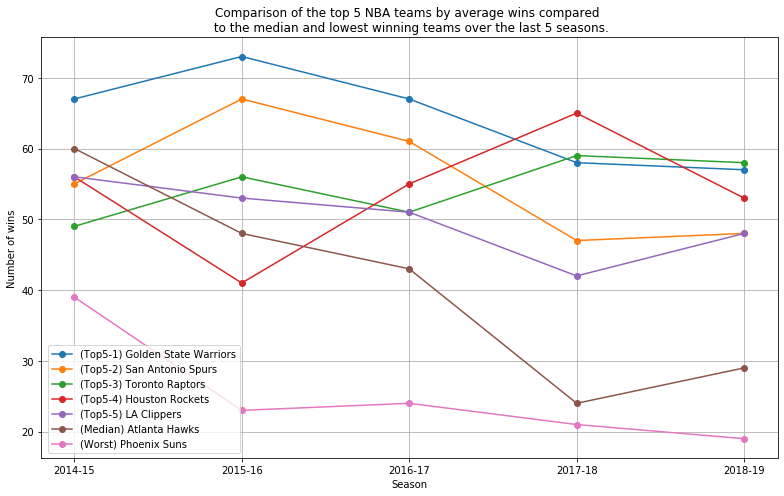

In [9]:
#Setup the x-axist of the line plot
x_axis = nba_wins_df['Season']

# Teams with the top 5 average wins
y_axis_GSW = nba_wins_df['GSW']
y_axis_SAS = nba_wins_df['SAS']
y_axis_TOR = nba_wins_df['TOR']
y_axis_HOU = nba_wins_df['HOU']  
y_axis_LAC = nba_wins_df['LAC']

# Team at the median by average wins
y_axis_ATL = nba_wins_df['ATL']

# Team with lowest average wins
y_axis_PHO = nba_wins_df['PHO']

plt.figure(figsize=(11,7))

GSW, = plt.plot(x_axis,y_axis_GSW, marker = 'o', label = '(Top5-1) Golden State Warriors')
SAS, = plt.plot(x_axis,y_axis_SAS, marker = 'o', label = '(Top5-2) San Antonio Spurs')
TOR, = plt.plot(x_axis,y_axis_TOR, marker = 'o', label = '(Top5-3) Toronto Raptors')
HOU, = plt.plot(x_axis,y_axis_HOU, marker = 'o', label = '(Top5-4) Houston Rockets')
LAC, = plt.plot(x_axis,y_axis_LAC, marker = 'o', label = '(Top5-5) LA Clippers')

#Team with the Median average wins
ATL, = plt.plot(x_axis,y_axis_ATL, marker = 'o', label = '(Median) Atlanta Hawks')

# Team with the lowest average wins
PHO, = plt.plot(x_axis,y_axis_PHO, marker = 'o', label = '(Worst) Phoenix Suns')

plt.title('Comparison of the top 5 NBA teams by average wins compared \n to the median and lowest winning teams over the last 5 seasons.')
plt.xlabel('Season')
plt.ylabel('Number of wins')

plt.grid()
plt.legend(loc = 'upper left',bbox_to_anchor =(.003,.28))
plt.tight_layout()
plt.savefig("../Plots/Top5TeamsMeantoLowestMeanComparison.png")
plt.show()

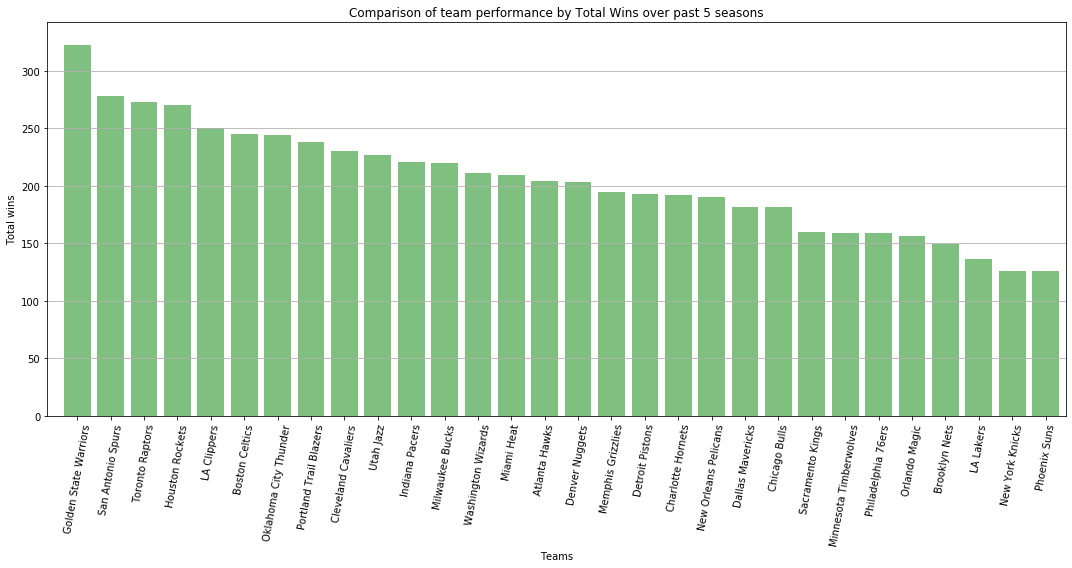

In [10]:
# Set x axis and tick locations
x_axis = np.arange(len(nba_sum_wins_sorted_df))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,8))
plt.bar(x_axis, nba_sum_wins_sorted_df["Total Wins"], color='g', alpha=0.5, align="edge")

plt.xticks(tick_locations, nba_sum_wins_sorted_df["Team Name"], rotation= 80)

# Set Title and labels
plt.title("Comparison of team performance by Total Wins over past 5 seasons")
plt.xlabel("Teams")
plt.ylabel("Total wins")

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(nba_sum_wins_sorted_df["Total Wins"])+20)

# Show horizontal grid lines for better clarity
axes = plt.gca()
axes.yaxis.grid()

plt.tight_layout()

# Save the figure and show it
plt.savefig("../Plots/TotalTeamWinsComparison.png")
plt.show()

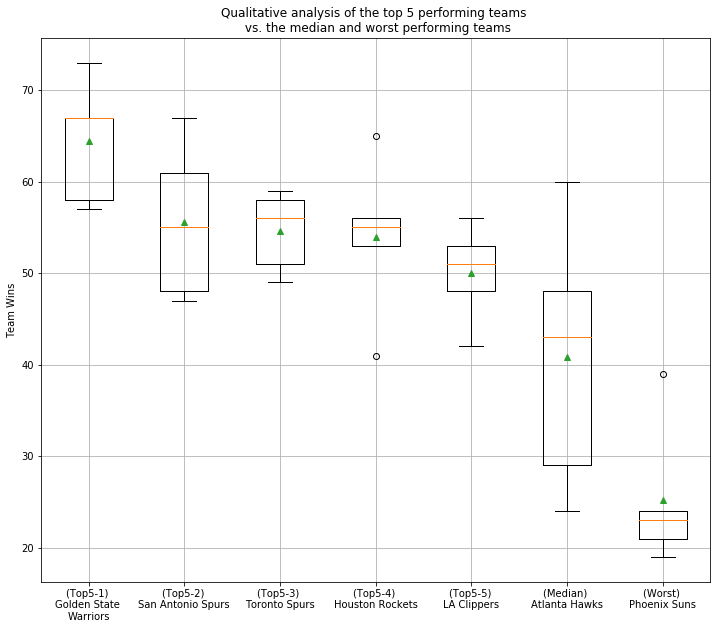

In [11]:
teamslist = ['GSW','SAS','TOR','HOU','LAC','ATL','PHO']
teamslist_names = ['(Top5-1) \nGolden State \nWarriors','(Top5-2) \nSan Antonio Spurs','(Top5-3) \nToronto Spurs','(Top5-4) \nHouston Rockets','(Top5-5) \nLA Clippers','(Median) \nAtlanta Hawks','(Worst) \nPhoenix Suns']


x_axis = np.arange(1, len(teamslist)+1)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

teamwins_data =[]
for team in teamslist:
    teamwins_data.append(nba_wins_df[team])  
    
#plt.figure(figsize=(15,8))
fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Qualitative analysis of the top 5 performing teams \n vs. the median and worst performing teams')
ax1.set_ylabel('Team Wins')
ax1.boxplot(teamwins_data,showmeans=True,notch = False)

plt.xticks(tick_locations, teamslist_names, rotation = 0)

# Show grid lines for better clarity
plt.grid()

plt.savefig("../Plots/ComparisonBoxplotofMeanWins.png")
plt.show()



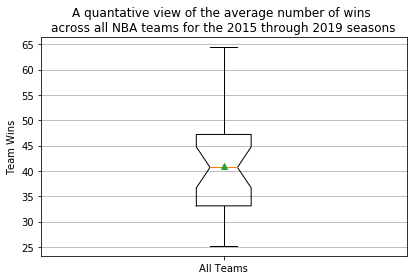

The lower quartile of team wins is: 33.1
The upper quartile of team wins is: 47.2
The interquartile range of team wins is: 14.100000000000001
The median of team wins is: 40.7 
Values below 11.95 could be outliers.
Values above 68.35000000000001 could be outliers.


In [12]:
#--------------------------------------------
#teamwins = nba_sum_wins_sorted_df['Total Wins']
meanteamwins = nba_mean_wins_sorted_df['Mean Wins']

fig1, ax1 = plt.subplots()
ax1.set_title('A quantative view of the average number of wins \nacross all NBA teams for the 2015 through 2019 seasons')
ax1.set_ylabel('Team Wins')
# Show horizontal grid lines for better clarity
axes = plt.gca()
axes.yaxis.grid()

plt.tight_layout()
ax1.boxplot(meanteamwins,showmeans=True,notch = True)
plt.xticks([1], ['All Teams'], rotation = 0)
plt.savefig("../Plots/BoxplotofMeanWins.png")
plt.show()

# Quartile calculations
quartiles = meanteamwins.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of team wins is: {lowerq}")
print(f"The upper quartile of team wins is: {upperq}")
print(f"The interquartile range of team wins is: {iqr}")
print(f"The median of team wins is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
